In [44]:
import pandas as pd
import numpy as np

df_address = pd.read_csv("address.csv")
df_property = pd.read_csv("property_listings.csv")

# Merge on address_id
df = df_property.merge(df_address, left_on="address_id", right_on="id", suffixes=('_property', '_address'))

# Optional: Drop duplicate or redundant columns
df.drop(columns=["id_address"], inplace=True, errors='ignore')


In [45]:
# Show missing data
print(df.isnull().sum())

# Handle missing values
df["price"] = df["price"].fillna(df["price"].median())
df["square_feet"] = df["square_feet"].fillna(df["square_feet"].median())
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].median())
df["locality"] = df["locality"].fillna("Unknown")


id_property                    0
price                          0
bedrooms                       0
bathrooms                      0
square_feet                    0
sale_status                    0
acre_lot                       0
tour_available                 0
image_source                   0
address_id                     0
created_at_property            0
realtor_link               10964
date_posted                10963
updated_at_property        10963
country                        0
administrative_area           28
sub_administrative_area    10963
locality                      29
postal_code                   29
street                        28
premise                       49
sub_premise                 5935
created_at_address             0
latitude                      36
longitude                     36
updated_at_address         10951
dtype: int64


In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[["price", "square_feet"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Encode 'locality' 
df["locality_encoded"] = df["locality"].astype("category").cat.codes

X = df[["square_feet", "bedrooms", "bathrooms", "locality_encoded"]]

# Log-transform the price column
df["log_price"] = np.log1p(df["price"])
y = df["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 0.712018959861132


C:\Users\mirro\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


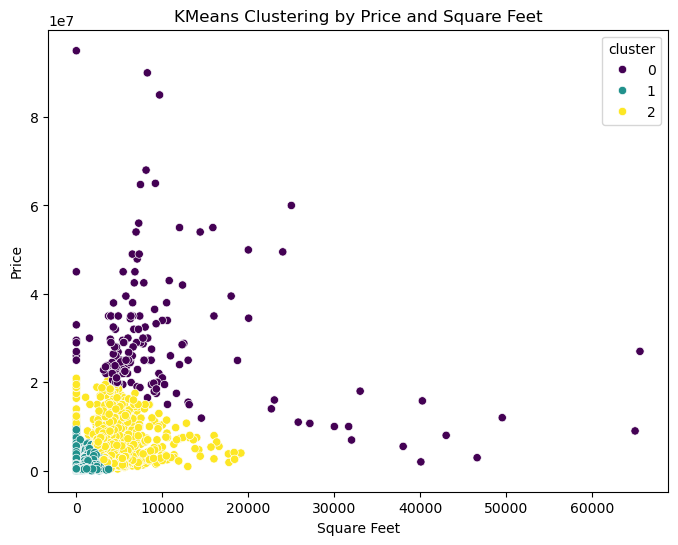

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="square_feet", y="price", hue="cluster", palette="viridis")
plt.title("KMeans Clustering by Price and Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.show()


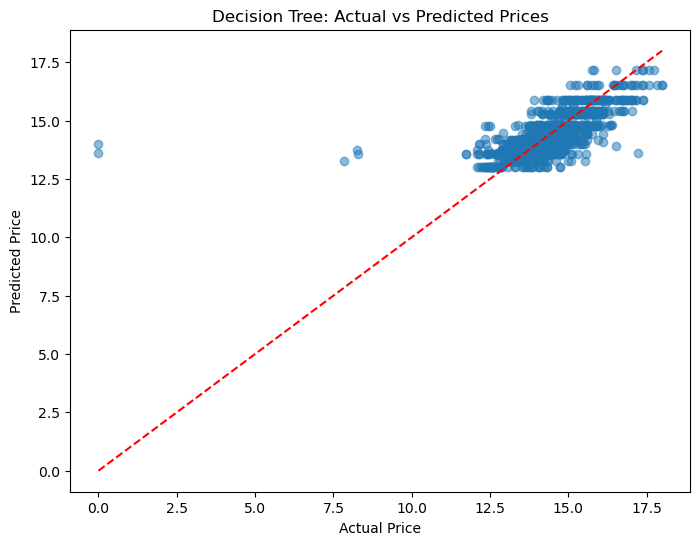

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


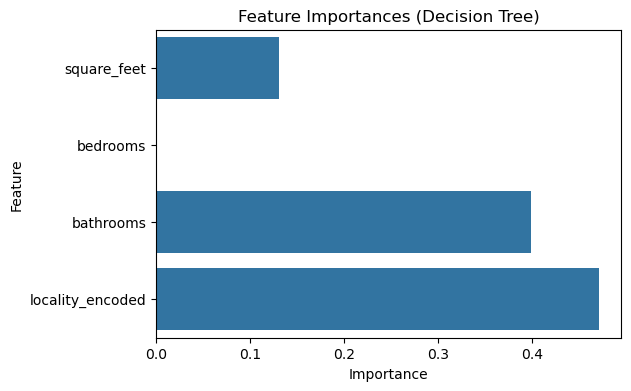

In [50]:
importances = tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
